In [1]:
import pandas as pd #this imports pandas as pd to shorten function calls
print(pd.__version__)
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re # find digits in string
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected = True)

1.3.4


## Consumption Heatmap

In [2]:
df = pd.read_pickle('Data/allCombined.pkl')
df.columns[100:200]
years = ['Both sexes_2000','Both sexes_2005','Both sexes_2010','Both sexes_2013','Both sexes_2014','Both sexes_2015','Both sexes_2016','Both sexes_2017','Both sexes_2018']

In [3]:
usage = df[years]
#usage['Both sexes_2000']
usage = usage.dropna()
usage = usage.mean(axis = 1)
usage = usage.to_frame()
usage

,0
0,29.244444
1,19.577778
2,34.755556
3,22.144444
4,26.555556
...,...
183,32.577778
184,23.833333
185,33.366667
186,16.288889


In [4]:
code = df['Code'].to_frame()
usage = pd.DataFrame().join([usage, code], how="outer")
print(usage.head())
usage = usage.rename(columns={0: 'Both Sexes Average Use'})

           0 Code
0  29.244444  ARM
1  19.577778  AUS
2  34.755556  AUT
3  22.144444  AZE
4  26.555556  BEL


In [5]:
original_countries = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')

In [6]:
#print(countries['CODE'])
#print(usage.shape)
usage = usage.sort_values(by=['Code'])
usage = usage.dropna()
#print(countries.sort_values(by=['CODE']))
#print(countries.head())
countries = original_countries.rename(columns={"CODE": "Code"})
print(countries.columns)
remove_extra_cols = pd.merge(usage, countries, how='left', on='Code')
print(remove_extra_cols.shape)
print(usage.shape)
countries = remove_extra_cols[['Code', 'COUNTRY', 'GDP (BILLIONS)']]
print(countries.shape)
remove_extra_cols.head()

Index(['COUNTRY', 'GDP (BILLIONS)', 'Code'], dtype='object')
(147, 4)
(147, 2)
(147, 3)


,Both Sexes Average Use,Code,COUNTRY,GDP (BILLIONS)
0,30.722222,ALB,Albania,13.40
1,34.511111,AND,Andorra,4.80
2,19.288889,ARE,United Arab Emirates,416.40
3,28.700000,ARG,Argentina,536.20
4,29.244444,ARM,Armenia,10.88


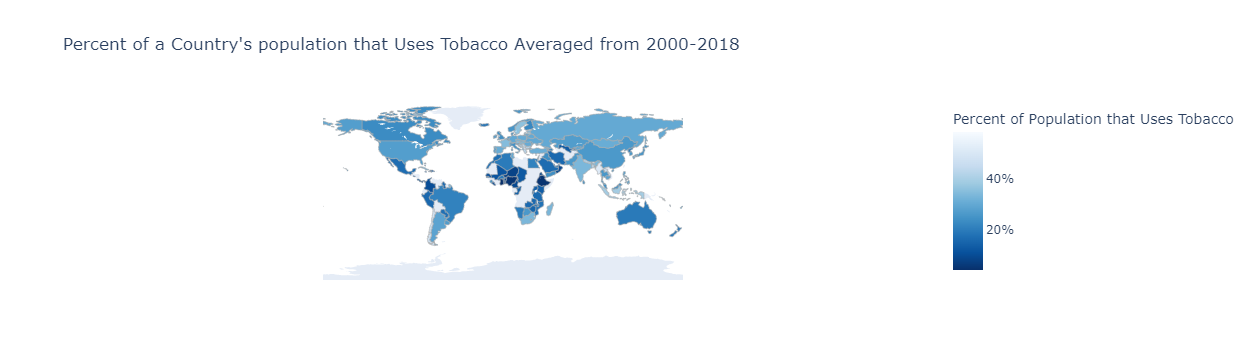

In [43]:
fig = go.Figure(data=go.Choropleth(
    locations = countries['Code'],
    z = usage['Both Sexes Average Use'],
    text = countries['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5, 
    colorbar_ticksuffix = '%',
    colorbar_title = 'Percent of Population that Uses Tobacco',
))

fig.update_layout(
    title_text="Percent of a Country's population that Uses Tobacco Averaged from 2000-2018",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.write_image("gallery/Consumption.All.Tobacco.pdf", width=1000, height=400, scale=5)
fig.show()
#img_bytes = fig.to_image(format="png", width=1000, height=400, scale=5)
#Image(img_bytes)


In [32]:
from IPython.display import Image

## Gender Consumption Heatmaps (Tons and MilUsd)

In [33]:
df.columns[100:200]

Index(['sales_per_day_1994', 'sales_per_day_1995', 'sales_per_day_1996',
       'sales_per_day_1997', 'sales_per_day_1998', 'sales_per_day_1999',
       'sales_per_day_2000', 'sales_per_day_2001', 'sales_per_day_2002',
       'sales_per_day_2003', 'sales_per_day_2004', 'sales_per_day_2005',
       'sales_per_day_2006', 'sales_per_day_2007', 'sales_per_day_2008',
       'sales_per_day_2009', 'sales_per_day_2010', 'sales_per_day_2011',
       'sales_per_day_2012', 'sales_per_day_2013', 'sales_per_day_2014',
       'sales_per_day_2015', 'AvgCigarettePriceDollars_2012',
       'AvgCigarettePriceDollars_2014', 'AvgTaxesAsPctCigarettePrice_2012',
       'AvgTaxesAsPctCigarettePrice_2014', 'EnforceBansTobaccoAd_2007',
       'EnforceBansTobaccoAd_2010', 'EnforceBansTobaccoAd_2012',
       'EnforceBansTobaccoAd_2014', 'HelpToQuit_2007', 'HelpToQuit_2010',
       'HelpToQuit_2012', 'HelpToQuit_2014', 'Both sexes_2000', 'Female_2000',
       'Male_2000', 'Both sexes_2005', 'Female_2005', 'Male_2

In [34]:
labels = ['Female_2000','Male_2000', 'Both sexes_2005', 'Female_2005', 'Male_2005',
       'Both sexes_2010', 'Female_2010', 'Male_2010', 'Both sexes_2013',
       'Female_2013', 'Male_2013', 'Both sexes_2014', 'Female_2014',
       'Male_2014', 'Both sexes_2015', 'Female_2015', 'Male_2015',
       'Both sexes_2016', 'Female_2016', 'Male_2016', 'Both sexes_2017',
       'Female_2017', 'Male_2017', 'Both sexes_2018', 'Female_2018']
female_labels = []
male_labels = []
for label in labels:
    if label.startswith('F'):
        female_labels.append(label)
    elif label.startswith('M'):
        male_labels.append(label)
male = df[male_labels]
female = df[female_labels]
#for label in male_labels:
 #   print(male[label].isnull().sum())
#for label in female_labels:
 #   print(female[label].isnull().sum() - len(female[label]))
    #tons = tons[label].fillna(value=tons[label].mean()) 
    #, inplace=True

# Male Consumption Percentages

In [35]:
print(male.head())
male = male.dropna()
print(male.shape)
male = male.mean(axis = 1)
male = male.to_frame()
male = male.rename(columns={0: 'Percent Males Use Tobacco'})
male = pd.DataFrame().join([male, code], how="outer")
male = male.sort_values(by=['Code'])
male = male.dropna()
male.shape

   Male_2000  Male_2005  Male_2010  Male_2013  Male_2014  Male_2015  \
0       66.1       62.4       58.2       55.9       54.8       54.1   
1       29.9       26.4       22.9       21.2       20.7       20.3   
2       53.0       45.4       38.8       35.2       34.4       33.2   
3       55.9       50.2       45.3       42.7       42.0       41.1   
4       34.7       32.3       30.0       28.9       28.3       27.9   

   Male_2016  Male_2017  
0       53.5       52.9  
1       19.7       19.2  
2       32.3       31.3  
3       40.4       39.6  
4       27.6       27.2  
(147, 8)


(147, 2)

In [36]:
male_countries = original_countries.rename(columns={"CODE": "Code"})
print(male_countries.shape)
print(male.shape)
remove_extra_cols = pd.merge(male, male_countries, how='left', on='Code')
print(remove_extra_cols.shape)
print(male.shape)
male_countries = remove_extra_cols[['Code', 'COUNTRY', 'GDP (BILLIONS)']]
print(male_countries.shape)
remove_extra_cols.head()

(222, 3)
(147, 2)
(147, 4)
(147, 2)
(147, 3)


,Percent Males Use Tobacco,Code,COUNTRY,GDP (BILLIONS)
0,52.8375,ALB,Albania,13.40
1,39.6250,AND,Andorra,4.80
2,37.8500,ARE,United Arab Emirates,416.40
3,36.4750,ARG,Argentina,536.20
4,57.2375,ARM,Armenia,10.88


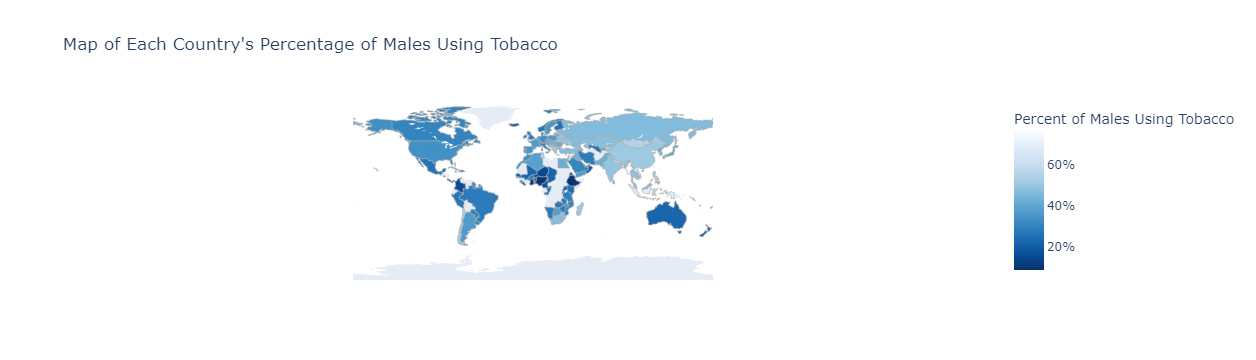

In [37]:
fig = go.Figure(data=go.Choropleth(
    locations = male_countries['Code'],
    z = male['Percent Males Use Tobacco'],
    text = male_countries['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5, 
    colorbar_ticksuffix = '%',
    colorbar_title = 'Percent of Males Using Tobacco',
))

fig.update_layout(
    title_text="Map of Each Country's Percentage of Males Using Tobacco",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.write_image("gallery/Consumption.male.Tobacco.pdf", width=1000, height=400, scale=5)

fig.show()

# Female Consumption Percentages

In [38]:
female = female.dropna()
print(female.shape)
female = female.mean(axis = 1)
female = female.to_frame()
female = female.rename(columns={0: 'Percent Females Use Tobacco'})
female = pd.DataFrame().join([female, code], how="outer")
female = female.sort_values(by=['Code'])
female = female.dropna()
female_countries = original_countries.rename(columns={"CODE": "Code"})
print(female_countries.shape)
print(female.shape)
remove_extra_cols = pd.merge(female, female_countries, how='left', on='Code')
print(remove_extra_cols.shape)
print(female.shape)
female_countries = remove_extra_cols[['Code', 'COUNTRY', 'GDP (BILLIONS)']]
print(female_countries.shape)
remove_extra_cols.head()

(147, 9)
(222, 3)
(147, 2)
(147, 4)
(147, 2)
(147, 3)


,Percent Females Use Tobacco,Code,COUNTRY,GDP (BILLIONS)
0,8.855556,ALB,Albania,13.40
1,29.544444,AND,Andorra,4.80
2,0.944444,ARE,United Arab Emirates,416.40
3,21.855556,ARG,Argentina,536.20
4,1.855556,ARM,Armenia,10.88


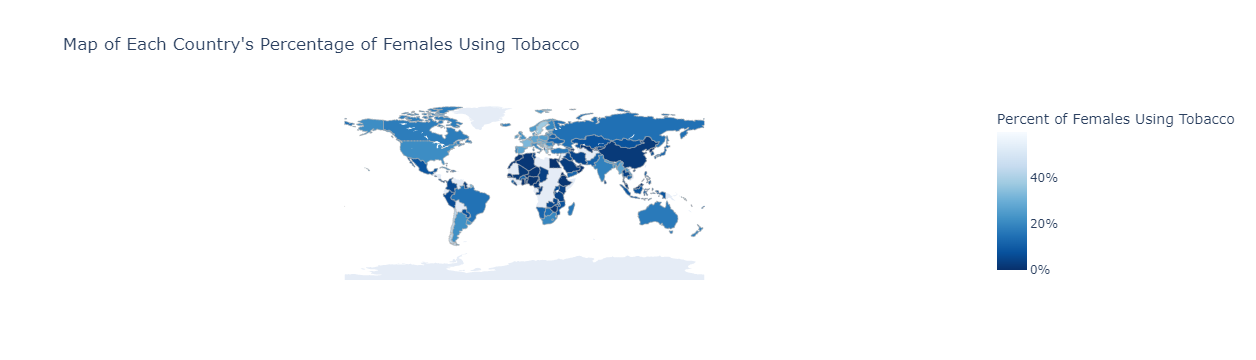

In [39]:
fig = go.Figure(data=go.Choropleth(
    locations = female_countries['Code'],
    z = female['Percent Females Use Tobacco'],
    text = female_countries['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5, 
    colorbar_ticksuffix = '%',
    colorbar_title = 'Percent of Females Using Tobacco',
))

fig.update_layout(
    title_text="Map of Each Country's Percentage of Females Using Tobacco",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.write_image("gallery/Consumption.female.Tobacco.pdf", width=1000, height=400, scale=5)

fig.show()

# Gender Disparity Consumption Percentages
### Male Percentage - Female Percentage

In [40]:
print(male.head())
print(male.shape)
print(female.head())
print(female.shape)
cbd = male.subtract(female)
print(cdb.head())

    Percent Males Use Tobacco Code
44                    52.8375  ALB
45                    39.6250  AND
46                    37.8500  ARE
47                    36.4750  ARG
0                     57.2375  ARM
(147, 2)
    Percent Females Use Tobacco Code
44                     8.855556  ALB
45                    29.544444  AND
46                     0.944444  ARE
47                    21.855556  ARG
0                      1.855556  ARM
(147, 2)


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [41]:
female = female.dropna()
print(female.shape)
female = female.mean(axis = 1)
female = female.to_frame()
female = female.rename(columns={0: 'Percent Females Use Tobacco'})
female = pd.DataFrame().join([female, code], how="outer")
female = female.sort_values(by=['Code'])
female = female.dropna()
female_countries = original_countries.rename(columns={"CODE": "Code"})
print(female_countries.shape)
print(female.shape)
remove_extra_cols = pd.merge(female, female_countries, how='left', on='Code')
print(remove_extra_cols.shape)
print(female.shape)
female_countries = remove_extra_cols[['Code', 'COUNTRY', 'GDP (BILLIONS)']]
print(female_countries.shape)
remove_extra_cols.head()

(147, 2)
(222, 3)
(147, 2)
(147, 4)
(147, 2)
(147, 3)


C:\Users\yuyan\AppData\Local\Temp/ipykernel_26380/687027059.py:3: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Percent Females Use Tobacco,Code,COUNTRY,GDP (BILLIONS)
0,8.855556,ALB,Albania,13.40
1,29.544444,AND,Andorra,4.80
2,0.944444,ARE,United Arab Emirates,416.40
3,21.855556,ARG,Argentina,536.20
4,1.855556,ARM,Armenia,10.88


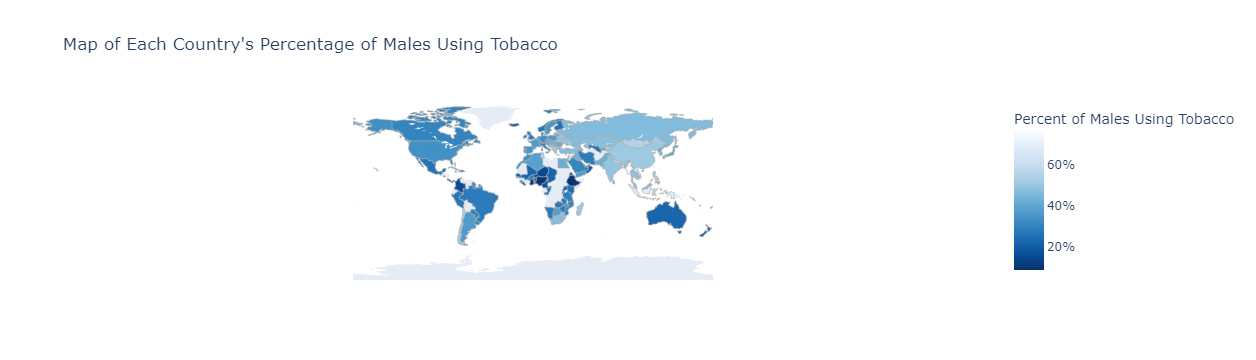

In [42]:
fig = go.Figure(data=go.Choropleth(
    locations = male_countries['Code'],
    z = male['Percent Males Use Tobacco'],
    text = male_countries['COUNTRY'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5, 
    colorbar_ticksuffix = '%',
    colorbar_title = 'Percent of Males Using Tobacco',
))

fig.update_layout(
    title_text="Map of Each Country's Percentage of Males Using Tobacco",
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    )
)

fig.show()